In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model, datasets
from sklearn.linear_model import Lasso
%matplotlib inline

In [2]:
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]

In [3]:
just_data = new_data.ix[:,:11]
just_dataT = just_data.T

In [4]:
genes_pca = PCA()
genes_pc = genes_pca.fit_transform(just_dataT)

In [5]:
print(genes_pca.explained_variance_ratio_)

[  5.52523295e-01   1.64026867e-01   8.90240697e-02   4.87904868e-02
   4.43305194e-02   3.44542972e-02   2.15485343e-02   1.81371253e-02
   1.58532208e-02   1.13115844e-02   2.64330765e-31]


In [6]:
result = -1
Cumsum = genes_pca.explained_variance_ratio_.cumsum()
for i in range(len(Cumsum)):
    if Cumsum[i]>=0.9:
        result = i
        break
print(result,"th PC")

5 th PC


In [7]:
genes_red = genes_pca.transform(just_dataT)

In [50]:
age

array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])

Lasso Regression: [ 0.48662638]


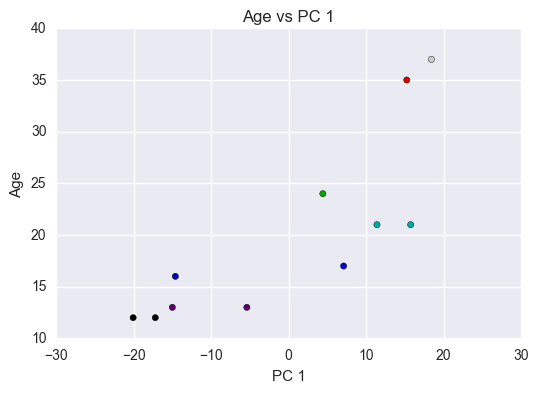

In [61]:
plt.scatter(genes_red[:,0].flatten(),age,
            c=age,cmap='nipy_spectral')

plt.xlabel('PC 1')
plt.ylabel('Age')
plt.title('Age vs PC 1')

clf = linear_model.Lasso(alpha=0.1)
clf.fit(genes_red[:,0].reshape(-1,1), age)

print('Lasso Regression:', clf.coef_)

Lasso Regression: [ 0.10378106]


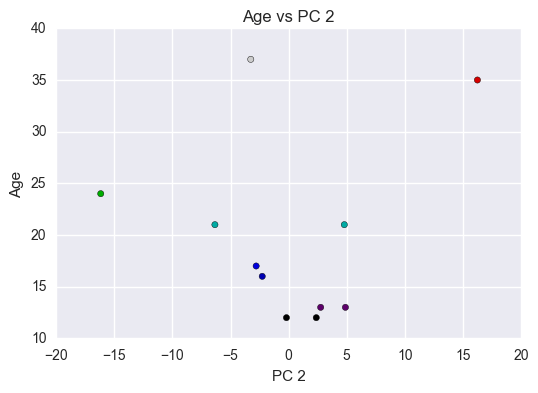

In [58]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(genes_red[:,1].reshape(-1,1), age)

print('Lasso Regression:', clf.coef_)

plt.scatter(genes_red[:,1].flatten(),age,
            c=age,cmap='nipy_spectral')
plt.xlabel('PC 2')
plt.ylabel('Age')
plt.title('Age vs PC 2')

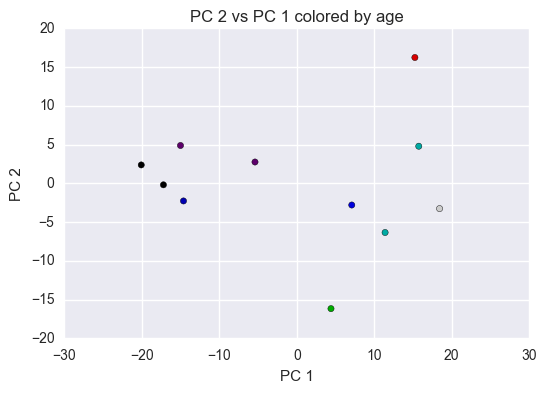

In [65]:
fig = plt.figure()
plt.scatter(genes_red[:,0].flatten(),genes_red[:,1].flatten(),
            c=age,cmap='nipy_spectral')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PC 2 vs PC 1 colored by age')

In [23]:
genes_red[:,0]

array([-20.06878115,  -5.39325033, -15.00765782, -17.20788952,
       -14.61996014,   7.09210382,  15.73838526,  11.39297443,
         4.41141799,  15.23941821,  18.42323924])

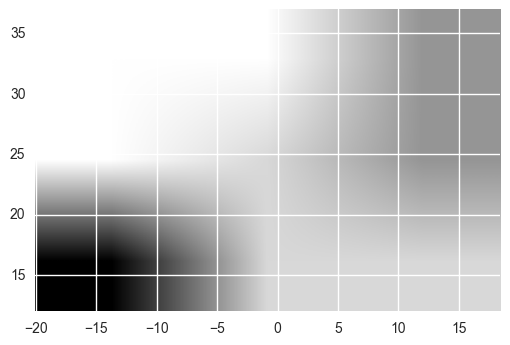

In [36]:
from matplotlib import cm as CM
heatmap, xedges, yedges = np.histogram2d(genes_red[:,0], age, bins=3)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

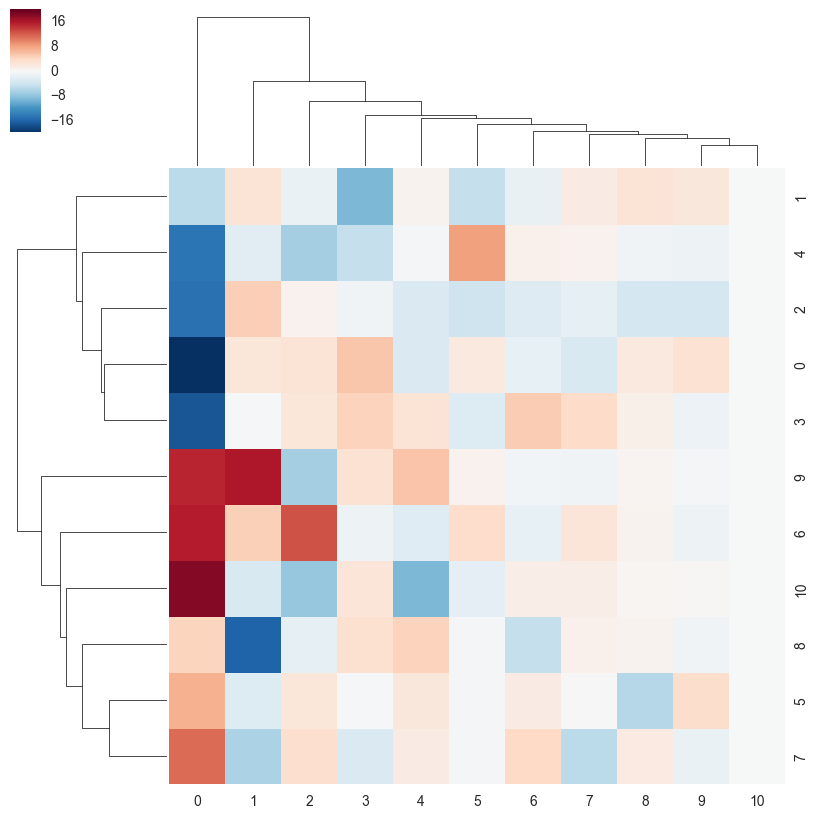

In [48]:
sns.clustermap(genes_red)

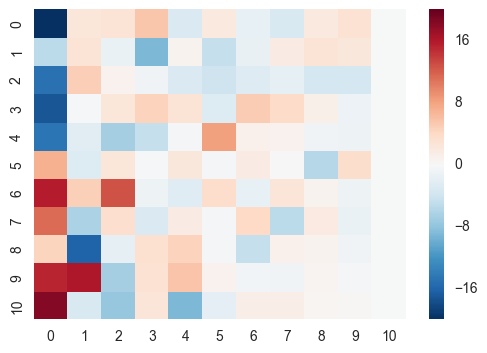

In [45]:
sns.heatmap(genes_red)

In [43]:
just_data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.1039,3.4865,2.3438,2.6535,1.9149,3.4019,3.9780,3.2876,3.9467,3.3072,3.4198
2,6.1532,7.1778,6.5365,6.8227,6.4406,7.5052,7.2353,7.3459,7.4539,7.3443,7.4484
3,2.3737,2.8386,2.1724,2.6676,2.2044,2.8495,2.9133,2.9174,2.8335,2.8269,2.8689
4,0.8133,2.5186,1.8037,1.7742,0.8331,2.3178,2.9540,2.5963,2.9586,3.1302,3.4110
5,2.3806,2.6172,2.2394,2.3388,1.8360,3.1963,3.5848,3.4812,3.3278,3.0575,3.1573


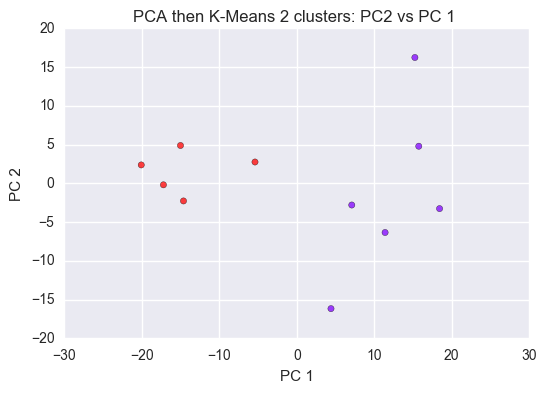

In [63]:
km = KMeans(n_clusters = 2)
clusters = km.fit(genes_red)

labels = km.labels_

plt.scatter(genes_red[:,0],genes_red[:,1],
            alpha=0.75, c=labels, cmap='rainbow')


plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA then K-Means 2 clusters: PC2 vs PC 1 ")

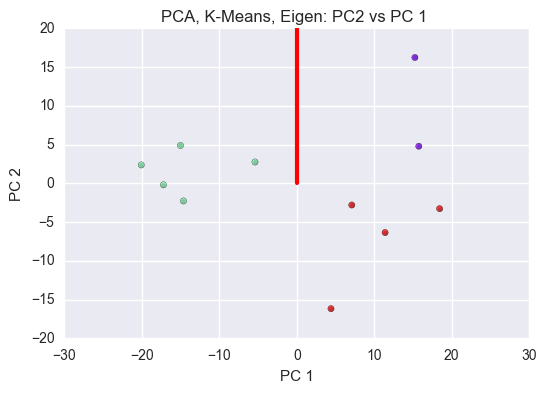

In [22]:
km = KMeans(n_clusters = 3)
clusters = km.fit(genes_pc)

labels = km.labels_

plt.scatter(genes_pc[:,0],genes_pc[:,1],
            alpha=0.75, c=labels, cmap='rainbow')


Cov = np.dot(genes_pc.T, genes_pc) / len(genes_pc)
T, D = np.linalg.eig(Cov)

plt.plot(genes_pc[:,0], genes_pc[:,1], 'k.', alpha=0.2)

pc1 = D[:, 1] * T[1]
plt.plot([0, pc1[0]], [0, pc1[1]], 'r-', linewidth=3)
plt.ylim(-20,20)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA, K-Means, Eigen: PC2 vs PC 1 ")

In [14]:
pd.DataFrame(new_data.ix[:,-1:]).head()
Predict = pd.DataFrame(labels)

In [15]:
#Data_Predict = np.column_stack((new_data.iloc[:,11:13], Predict))
#GeneID_Predict = pd.DataFrame(Data_Predict[:,:])

In [16]:
cluster0 = GeneID_Predict[GeneID_Predict[1]== 0]
cluster1 = GeneID_Predict[GeneID_Predict[1]== 1]
cluster2 = GeneID_Predict[GeneID_Predict[1]== 2]
cluster3 = GeneID_Predict[GeneID_Predict[1]== 3]
cluster4 = GeneID_Predict[GeneID_Predict[1]== 4]

NameError: name 'GeneID_Predict' is not defined

In [ ]:
Cluster0_genes = cluster0.iloc[:,0:1].values
Cluster1_genes = cluster1.iloc[:,0:1].values
Cluster2_genes = cluster2.iloc[:,0:1].values
Cluster3_genes = cluster3.iloc[:,0:1].values
Cluster4_genes = cluster4.iloc[:,0:1].values

In [ ]:
m = np.polyfit(genes_pc[:,0],genes_pc[:,1],1)
plt.plot(genes_pc[:,0], m[0]*genes_pc[:,0] + m[1], color='r')

In [ ]:
km = KMeans(n_clusters = 2)
clusters = km.fit(genes_pc)

labels = km.labels_

plt.scatter(genes_pc[:,0],genes_pc[:,1],
            alpha=0.75, c=labels, cmap='rainbow')


Cov = np.dot(genes_pc.T, genes_pc) / len(genes_pc)
T, D = np.linalg.eig(Cov)

plt.plot(genes_pc[:,0], genes_pc[:,1], 'k.', alpha=0.2)

pc1 = D[:, 1] * T[1]
plt.plot([0, pc1[0]], [0, pc1[1]], 'r-', linewidth=3)
plt.ylim(-20,20)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA, K-Means, Eigen: PC2 vs PC 1 ")